<a href="https://colab.research.google.com/github/Pancakeisdelicious/Machine-Learning/blob/main/Multiple_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(42, 9)
0.9903183436982124
0.9714559911594134
0.9999999999991097
-144.40579242684848
0.9896101671037343
0.9790693977615397


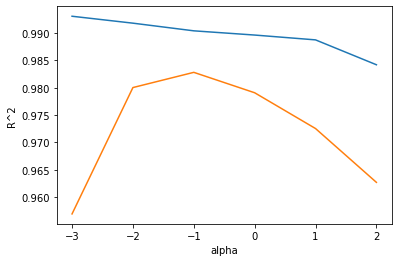

0.9903815817570366
0.9827976465386926
0.989789897208096
0.9800593698421883


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.336e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.025e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

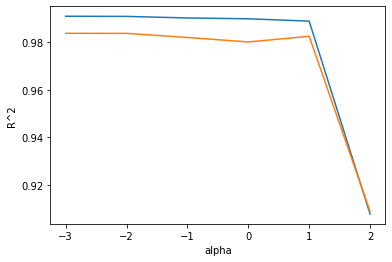

0.9888067471131867
0.9824470598706695


In [22]:
import pandas as pd
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
#print(perch_full)


import numpy as np
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])


from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    perch_full, perch_weight, random_state=42)


## 사이킷런의 변환기
# degree = 2
#poly.fit([[2,3]])  # 2개의 특성 2와 3으로 이루어진 샘플 

# 1(bias), 2, 3, 2**2, 2*3, 3*2(1,2,3,4,6,9) 
#print(poly.transform([[2,3]])) # 훈련-> 변환
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape) # 9개의 특성 
poly.get_feature_names_out()

test_poly = poly.transform(test_input) # 테스트 세트 변환

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.score(train_poly, train_target)) # 0.9903183436982124
print(lr.score(test_poly, test_target))   # 0.9714559911594134

## 더 많은 특성 만들기
poly = PolynomialFeatures(degree = 5, include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input) # 훈련 데이터
test_poly = poly.transform(test_input)   # 검증 데이터
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target)) # 0.9999999999991097
print(lr.score(test_poly, test_target)) # -144.40579242684848

## 규제(과도 학습을 규제함, 모델이 훈련 세트에 과대적합이 되지 않도록 만듬)
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)


## 릿지 회귀(선형 회귀 모델에 규제를 추가한 모델, 릿지)
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))# 0.9896101671037343
print(ridge.score(test_scaled, test_target))  # 0.9790693977615397



## 릿지 적절한 규제 강도 찾기(alpha, 값이 커지면 계수 값 감소-> 과소적합 되도록 유도, 값이 작아지면 과대적합)
import matplotlib.pyplot as plt
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  ridge = Ridge(alpha=  alpha) # 릿지 모델 만듬
  ridge.fit(train_scaled, train_target) # 릿지 모델 훈련
  train_score.append(ridge.score(train_scaled, train_target))  # 훈련 점수, 테스트 점수 저장
  test_score.append(ridge.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()  # 파란색이 훈련 세트, 노란색이 테스트 세트(과대적합, 최적 알파 값 -1)

ridge = Ridge(alpha = 0.1) 
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target)) # 0.9903815817570366
print(ridge.score(test_scaled, test_target))   # 0.9827976465386926


## 라쏘 회귀
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target)) # 0.989789897208096
print(lasso.score(test_scaled, test_target))   # 0.9800593698421883

train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  lasso = Lasso(alpha=  alpha) # 라쏘 모델 만듬
  lasso.fit(train_scaled, train_target) # 라쏘 모델 훈련
  train_score.append(lasso.score(train_scaled, train_target))  # 훈련 점수, 테스트 점수 저장
  test_score.append(lasso.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()  # 파란색이 훈련 세트, 노란색이 테스트 세트(최적 alpha값은 1)

lasso = Lasso(alpha = 10) 
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target)) # 0.9888067471131867
print(lasso.score(test_scaled, test_target))   # 0.9824470598706695


# 라쏘 모델의 계수는 coef에 저장 
print(np.sum(lasso.coef_ == 0)) # 40 




